<a href="https://colab.research.google.com/github/oputapray2/NLP/blob/main/Classification_nnlm_en_dim50_with_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
# Installing Required Models and packages

In [3]:
pip install numpy

In [4]:
pip install scikit-learn

In [5]:
pip install tensorflow

In [6]:
pip install protobuf==3.20.3

In [7]:
pip install tensorflow_datasets

In [8]:
pip install tensorflow_hub

In [9]:
pip install matplotlib

In [10]:
pip install pandas

In [11]:
globals().clear()  # clear all variables

import numpy as np
import sklearn
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
from sklearn.datasets import load_files
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics


In [13]:
print("Tensorflow Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")


Tensorflow Version:  2.15.0
Eager mode:  True
Hub version:  0.16.1
GPU is NOT AVAILABLE


In [14]:
# Sampling the Dataset

In [15]:
pip install wordcloud

Mounted at /content/drive


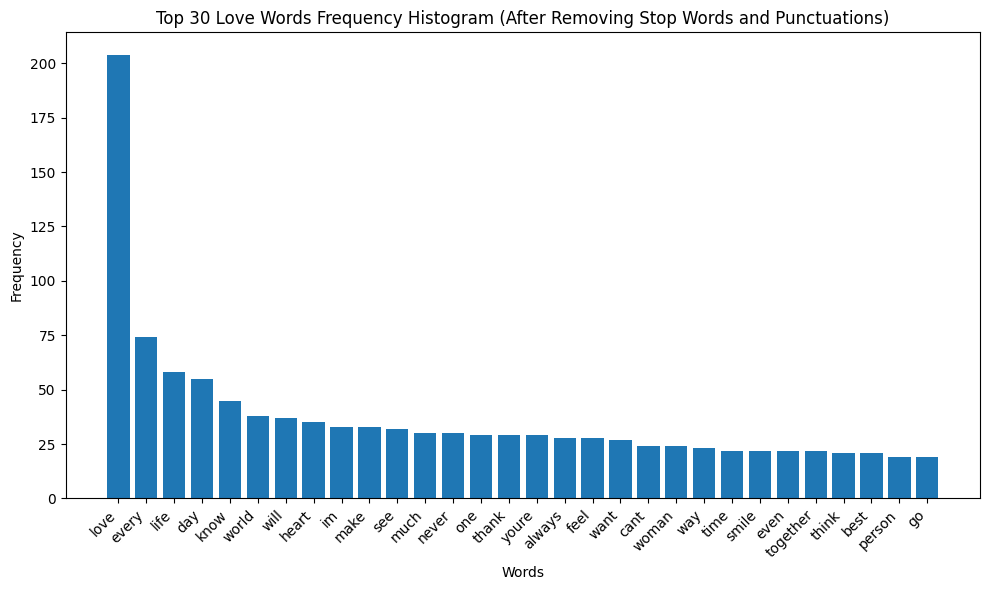

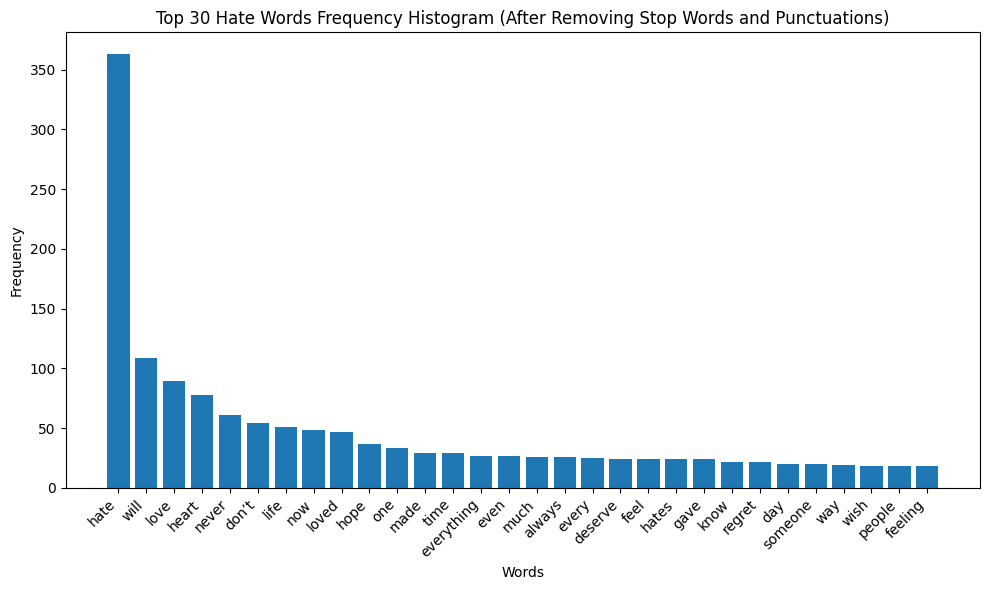

In [16]:

import os
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS
import string

from google.colab import drive
drive.mount('/content/drive')
import pathlib

folder_path  = '/content/drive/MyDrive/Love_Hate/Love'


# folder_path = "/home/oputapray/classification/Love_Hate/Love"

# Reading all text files from the folder
all_words = []
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r") as file:
            content = file.read()
            # Removing punctuation and split into words
            words = content.lower().translate(str.maketrans("", "", string.punctuation)).split()
            all_words.extend(words)

# Removing common stop words
filtered_words = [word for word in all_words if word not in STOPWORDS]

# Creating a word frequency dictionary
word_counts = Counter(filtered_words)

# Get the top 30 words
top_words = word_counts.most_common(30)

# Extracting word and frequency for plotting
words, frequencies = zip(*top_words)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Love Words Frequency Histogram (After Removing Stop Words and Punctuations)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()




folder_path = "/content/drive/MyDrive/Love_Hate/Hate"

# Reading all text files from the folder
all_words = []
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r") as file:
            content = file.read()
            # Removing punctuation and split into words
            words = content.lower().translate(str.maketrans("", "", string.punctuation)).split()
            all_words.extend(words)



# Removing common stop words
filtered_words = [word for word in all_words if word not in STOPWORDS]


# Create a word frequency dictionary
word_counts = Counter(filtered_words)

# Get the top 20 words
top_words = word_counts.most_common(30)

# Extract word and frequency for plotting
words, frequencies = zip(*top_words)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Hate Words Frequency Histogram (After Removing Stop Words and Punctuations)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

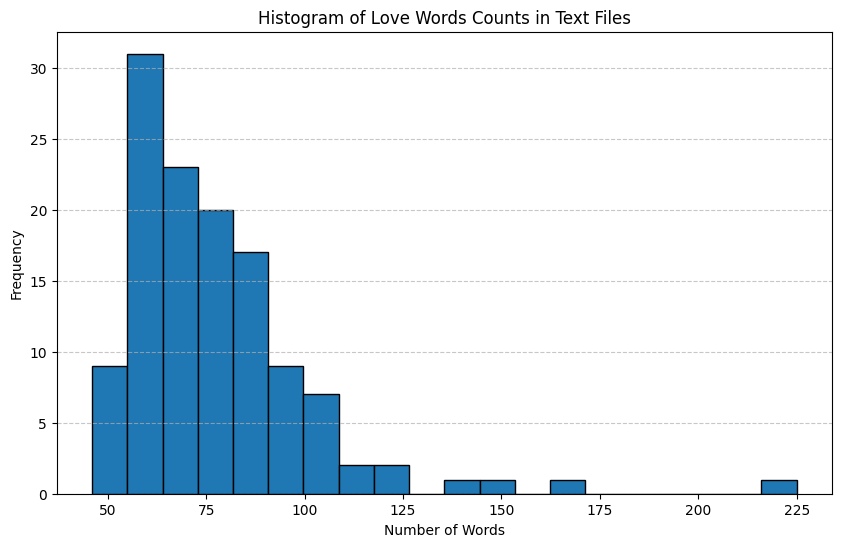

In [18]:
import os
import matplotlib.pyplot as plt

# Specify the folder path containing text files
folder_path = "/content/drive/MyDrive/Love_Hate/Love"

# Initialize an empty list to store word counts
word_counts = []

# Read all text files from the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r") as file:
            content = file.read()
            # Split content into words
            words = content.split()
            # Append the word count to the list
            word_counts.append(len(words))

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=20, edgecolor="black")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.title("Histogram of Love Words Counts in Text Files")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


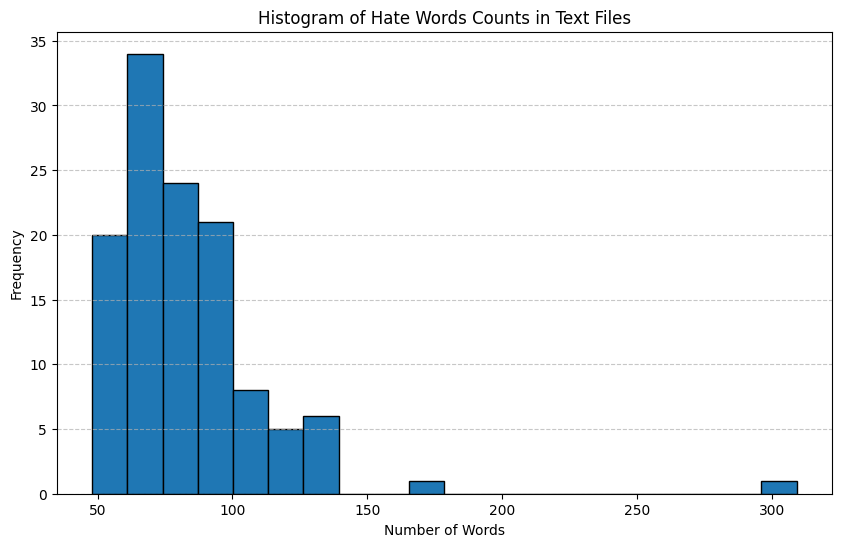

In [19]:
import os
import matplotlib.pyplot as plt

# Specify the folder path containing text files
folder_path = "/content/drive/MyDrive/Love_Hate/Hate"

# Initialize an empty list to store word counts
word_counts = []

# Read all text files from the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r") as file:
            content = file.read()
            # Split content into words
            words = content.split()
            # Append the word count to the list
            word_counts.append(len(words))

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=20, edgecolor="black")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.title("Histogram of Hate Words Counts in Text Files")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


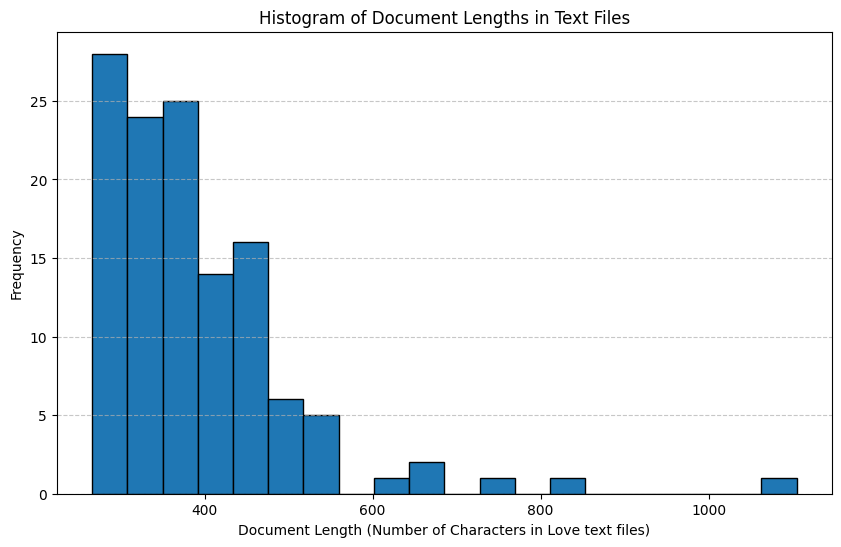

In [20]:
import os
import matplotlib.pyplot as plt

# Specify the folder path containing text files
folder_path = "/content/drive/MyDrive/Love_Hate/Love"

# Initialize an empty list to store document lengths
document_lengths = []

# Read all text files from the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r") as file:
            content = file.read()
            # Calculate the length (number of characters) in the document
            document_length = len(content)
            document_lengths.append(document_length)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(document_lengths, bins=20, edgecolor="black")
plt.xlabel("Document Length (Number of Characters in Love text files)")
plt.ylabel("Frequency")
plt.title("Histogram of Document Lengths in Text Files")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

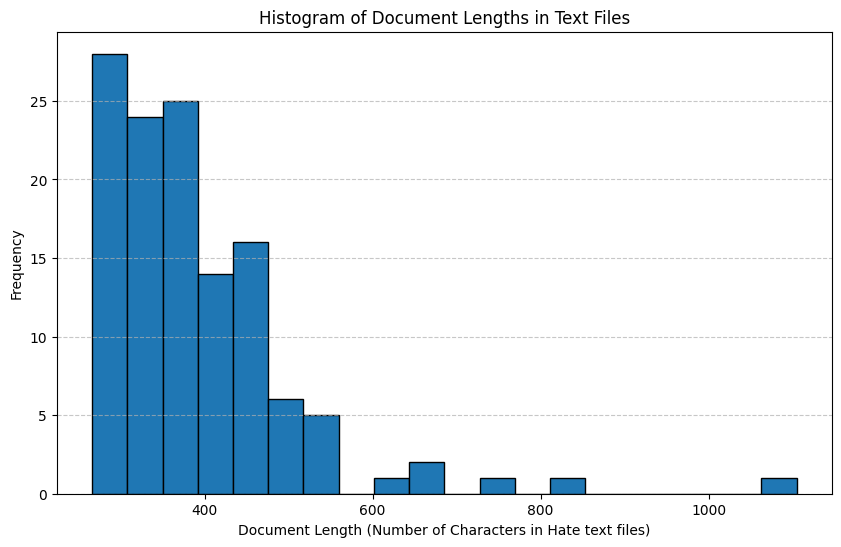

In [21]:
import os
import matplotlib.pyplot as plt

# Specify the folder path containing text files
folder_path = "/content/drive/MyDrive/Love_Hate/Love"

# Initialize an empty list to store document lengths
document_lengths = []

# Read all text files from the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r") as file:
            content = file.read()
            # Calculate the length (number of characters) in the document
            document_length = len(content)
            document_lengths.append(document_length)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(document_lengths, bins=20, edgecolor="black")
plt.xlabel("Document Length (Number of Characters in Hate text files)")
plt.ylabel("Frequency")
plt.title("Histogram of Document Lengths in Text Files")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

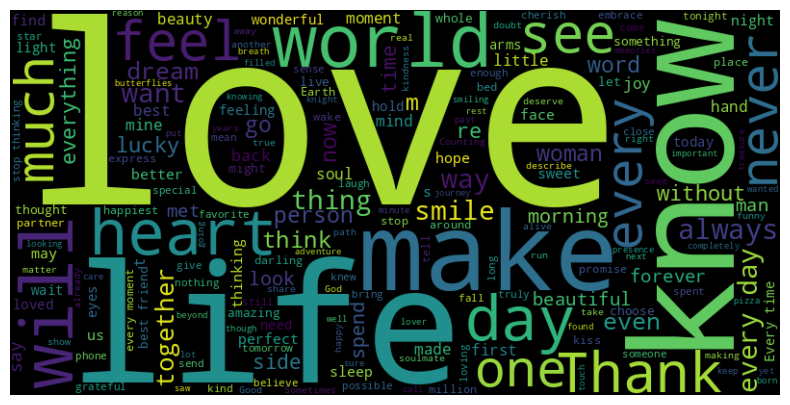

In [22]:
import os

folder_path = "/content/drive/MyDrive/Love_Hate/Love"
allsentences = []

for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r") as file:
            content = file.read()
            allsentences.append(content)

from collections import Counter

def tokenize(sentence):
    return sentence.lower().split()

vocab = set()
for sentence in allsentences:
    words = tokenize(sentence)
    vocab.update(words)


from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all sentences into a single string
all_text = " ".join(allsentences)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

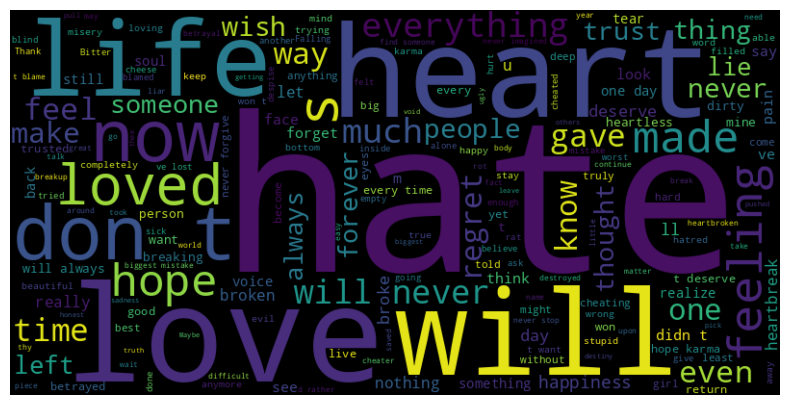

In [24]:
import os

folder_path = "/content/drive/MyDrive/Love_Hate/Hate"
allsentences = []

for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r") as file:
            content = file.read()
            allsentences.append(content)

from collections import Counter

def tokenize(sentence):
    return sentence.lower().split()

vocab = set()
for sentence in allsentences:
    words = tokenize(sentence)
    vocab.update(words)




from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all sentences into a single string
all_text = " ".join(allsentences)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [40]:
#Mapping out 20% of the Dataset for Test and Validation
test_precentage = 0.2
validation_precentage = 0.2

# Reading the dataset from the local folder, with folders as labels
dataset = load_files(r"/content/drive/MyDrive/Love_Hate")
X, y = dataset.data, dataset.target

In [41]:
# Dividing the dataset into training Dataset and testing Dataset
test_examples = np.asarray(X[:round(test_precentage * len(X))])
train_examples = np.asarray(X[round(test_precentage * len(X)):])

test_labels = np.asarray(y[:round(test_precentage * len(X))])
train_labels = np.asarray(y[round(test_precentage * len(X)):])

print("Training entries: {}, test entries: {}".format(len(train_examples), len(test_examples)))



Training entries: 196, test entries: 49


In [42]:
# Build the model and show its layers; model has two fully connected layers with hidden units of 16 and 1, respectively
model = "https://tfhub.dev/google/nnlm-en-dim50-with-normalization/2"

In [44]:
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples[:3])
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(5))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 5)                 48191501  
                                                                 
 dense_4 (Dense)             (None, 16)                96        
                                                                 
 dense_5 (Dense)             (None, 5)                 85        
                                                                 
Total params: 48191682 (183.84 MB)
Trainable params: 48191682 (183.84 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [47]:

# extracting validation examples from the training data
x_val = train_examples[:round(validation_precentage * len(train_examples))]
partial_x_train = train_examples[round(validation_precentage * len(train_examples)):]

y_val = train_labels[:round(validation_precentage * len(train_examples))]
partial_y_train = train_labels[round(validation_precentage * len(train_examples)):]


In [48]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
1/1 [==============================] - 4s 4s/step - loss: 1.3987 - accuracy: 0.4841 - val_loss: 1.3435 - val_accuracy: 0.5385
Epoch 2/40
1/1 [==============================] - 2s 2s/step - loss: 1.3555 - accuracy: 0.4841 - val_loss: 1.3034 - val_accuracy: 0.5385
Epoch 3/40
1/1 [==============================] - 3s 3s/step - loss: 1.3130 - accuracy: 0.4841 - val_loss: 1.2631 - val_accuracy: 0.5385
Epoch 4/40
1/1 [==============================] - 5s 5s/step - loss: 1.2709 - accuracy: 0.4841 - val_loss: 1.2233 - val_accuracy: 0.5385
Epoch 5/40
1/1 [==============================] - 8s 8s/step - loss: 1.2293 - accuracy: 0.4904 - val_loss: 1.1846 - val_accuracy: 0.5385
Epoch 6/40
1/1 [==============================] - 5s 5s/step - loss: 1.1878 - accuracy: 0.4904 - val_loss: 1.1474 - val_accuracy: 0.5385
Epoch 7/40
1/1 [==============================] - 2s 2s/step - loss: 1.1469 - accuracy: 0.4904 - val_loss: 1.1110 - val_accuracy: 0.5385
Epoch 8/40
1/1 [=========================

In [49]:
# see model training history
history_dict = history.history

In [50]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']


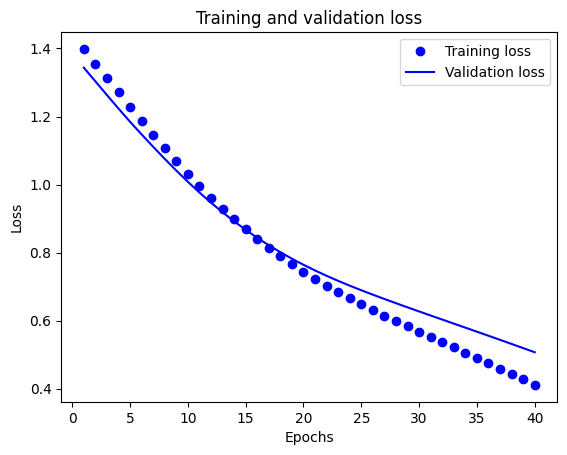

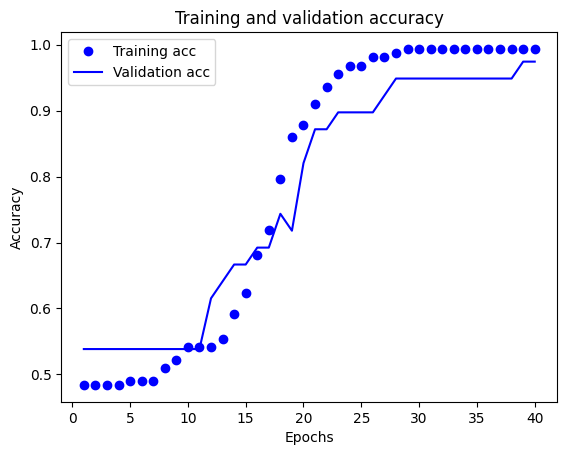

In [51]:
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()  # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [52]:

results = model.evaluate(test_examples, test_labels)  # this return loss value and accuracy
print(results)

# another method to evaluate performance
predictions = model.predict(test_examples).argmax(axis=-1)


confusionMatrix = confusion_matrix(test_labels, predictions, normalize='pred')
acc = metrics.accuracy_score(test_labels, predictions)
print(classification_report(test_labels, predictions))

2/2 [==============================] - 0s 185ms/step - loss: 0.5116 - accuracy: 0.9592
[0.5115635395050049, 0.9591836929321289]
2/2 [==============================] - 0s 171ms/step
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        23
           1       0.93      1.00      0.96        26

    accuracy                           0.96        49
   macro avg       0.96      0.96      0.96        49
weighted avg       0.96      0.96      0.96        49



In [53]:

# Evaluate the model on the test set
y_pred_labels = predictions
y_test_labels = test_labels


# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test_labels, y_pred_labels)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[21  2]
 [ 0 26]]


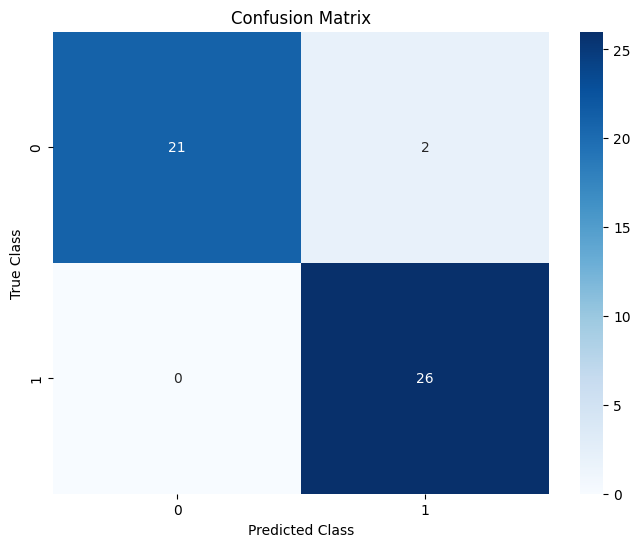

In [54]:
# # Visualising the confusion matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

In [55]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(test_labels, predictions)
print(f"MCC: {mcc:.4f}")

MCC: 0.9208


In [56]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(test_labels, predictions)
print(f"Cohen's Kappa: {kappa:.4f}")

Cohen's Kappa: 0.9176
